### Importing required modules

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [152]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max.columns',None)

### Reading and understanding Data

In [153]:
car = pd.read_csv('CarPrice_Assignment.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [154]:
car.shape

(205, 26)

In [155]:
car.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.90,0.95,0.99])

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
1%,3.040000,-1.960000,88.408000,144.816000,62.536000,48.824000,1819.720000,70.000000,2.910000,2.196800,7.000000,52.120000,4150.000000,14.040000,17.040000,5201.120000
5%,11.200000,-1.000000,93.020000,157.140000,63.600000,49.700000,1901.000000,90.000000,2.970000,2.640000,7.500000,62.000000,4250.000000,16.000000,22.000000,6197.000000
10%,21.400000,-1.000000,93.700000,157.300000,63.800000,50.600000,1947.000000,91.000000,2.970000,2.882000,8.000000,68.000000,4500.000000,17.000000,23.000000,6657.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [156]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Data Cleaning

In [157]:
car.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [158]:
car.duplicated().sum()

0

**No null values and No duplicates in the data**

In [159]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Imputation of columns

**Since 'symboling' column has only few unique values, we can convert that column into categorical column.**

In [160]:
car['symboling'].value_counts()

,count
symboling,
0,67
1,54
2,32
3,27
-1,22
-2,3


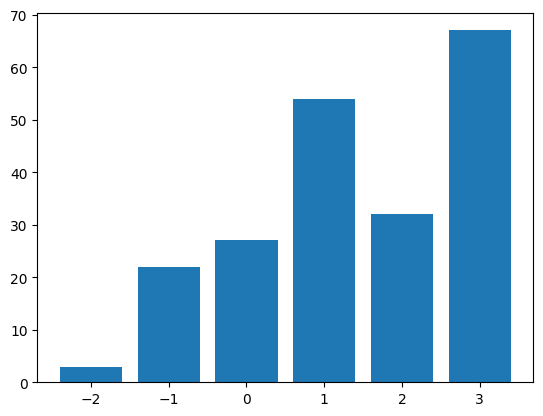

In [161]:
plt.bar(car['symboling'].unique(),car['symboling'].value_counts())
plt.show()

In [162]:
car['symboling'] = car['symboling'].astype('object')

**Since 'CarName' has many values. We have some values with same names but different spellings. So we need to correct them.**

In [163]:
car['CarName'].value_counts()

,count
CarName,
toyota corona,6
toyota corolla,6
peugeot 504,6
subaru dl,4
mitsubishi mirage g4,3
mazda 626,3
toyota mark ii,3
mitsubishi outlander,3
mitsubishi g4,3


In [164]:
car['Car Company'] = car['CarName'].apply(lambda x:x.split(' ')[0])
car['Car Company'].value_counts()

,count
Car Company,
toyota,31
nissan,17
mazda,15
honda,13
mitsubishi,13
subaru,12
peugeot,11
volvo,11
volkswagen,9


In [165]:
#Replace the incorrect spellings to corrected ones
car['Car Company'] = car['Car Company'].replace('maxda','mazda')
car['Car Company'] = car['Car Company'].replace('toyouta','toyota')
car['Car Company'] = car['Car Company'].replace('vokswagen','volkswagen')
car['Car Company'] = car['Car Company'].replace('porcshce','porsche')
car['Car Company'] = car['Car Company'].replace('Nissan','nissan')
car['Car Company'] = car['Car Company'].replace('vw','volkswagen')

In [166]:
car['Car Company'].nunique()

22

In [167]:
#Now remove the CarName column
car.drop('CarName',axis=1,inplace=True)

In [168]:
#Get the categorical columns
cat_col = car.select_dtypes(include='object').columns
cat_col

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'Car Company'],
      dtype='object')

In [169]:
for i in cat_col:
  print(car[i].value_counts())
  print('\n')

symboling
0     67
1     54
2     32
3     27
-1    22
-2     3
Name: count, dtype: int64


fueltype
gas       185
diesel     20
Name: count, dtype: int64


aspiration
std      168
turbo     37
Name: count, dtype: int64


doornumber
four    115
two      90
Name: count, dtype: int64


carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


enginelocation
front    202
rear       3
Name: count, dtype: int64


enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64


fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


Car Company
toyota         32
nissan         18
ma

In [170]:
#Get the numerical columns
num_col = car.select_dtypes(include=['int64','float64']).columns
num_col

Index(['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

### Data Visualization

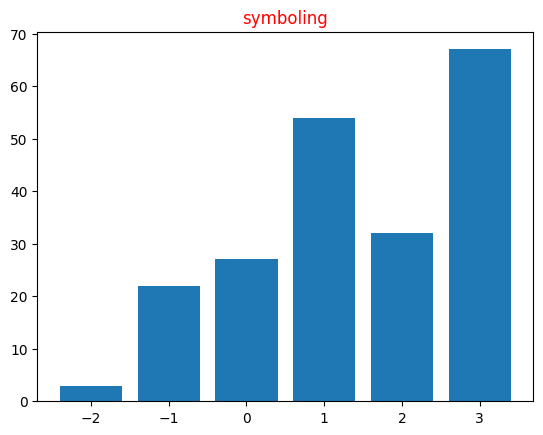

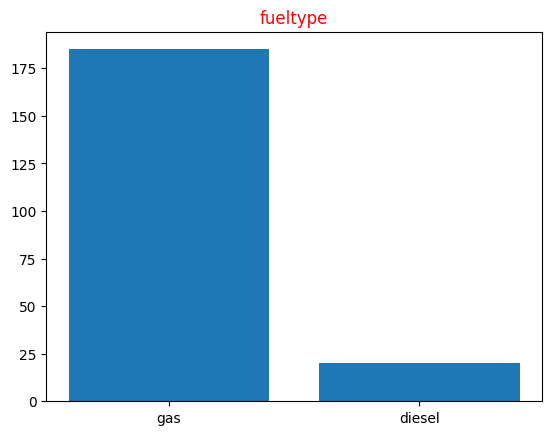

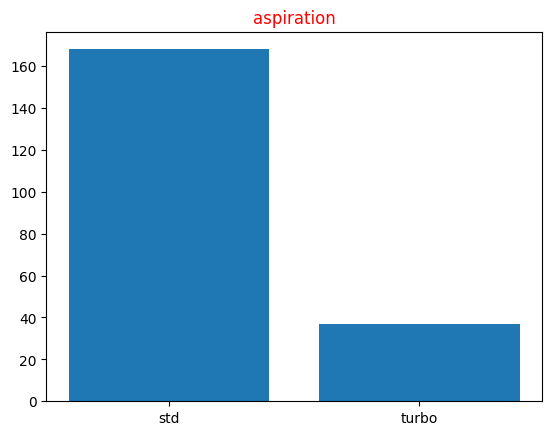

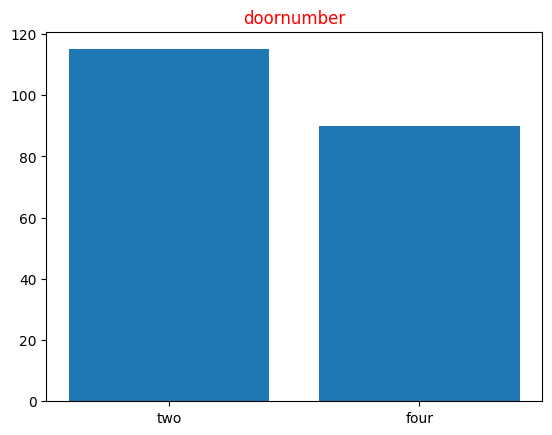

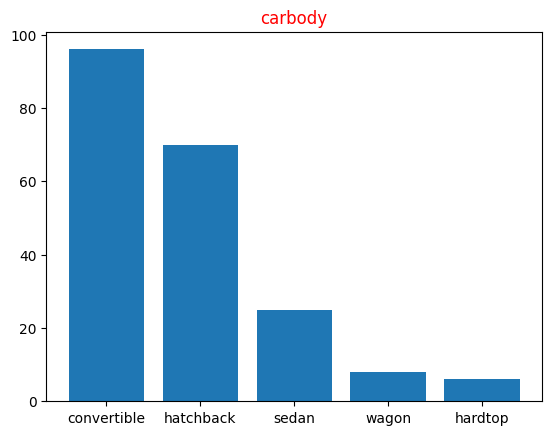

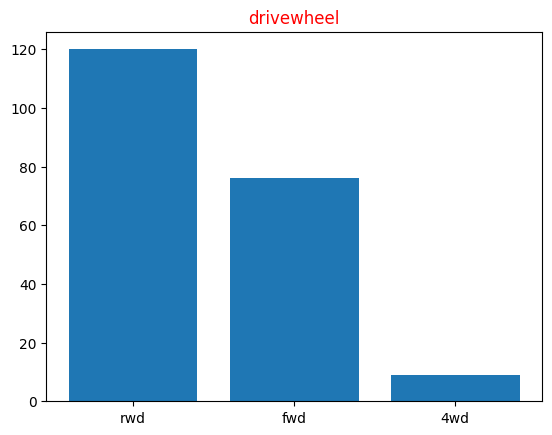

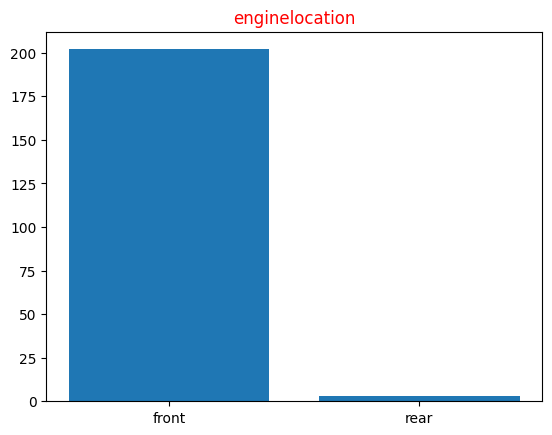

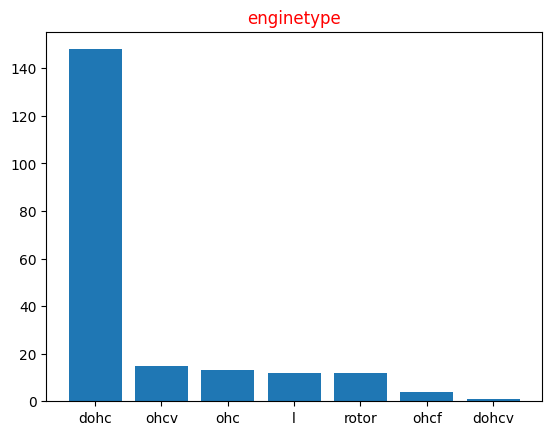

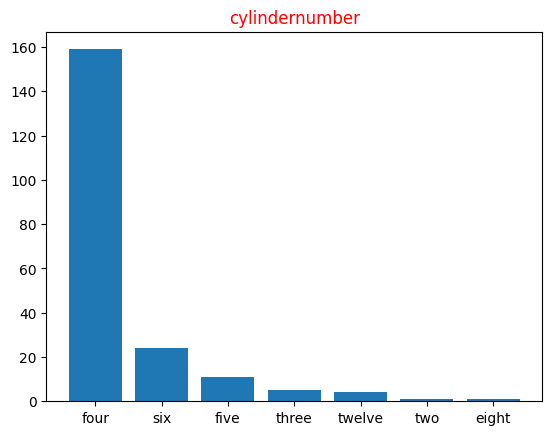

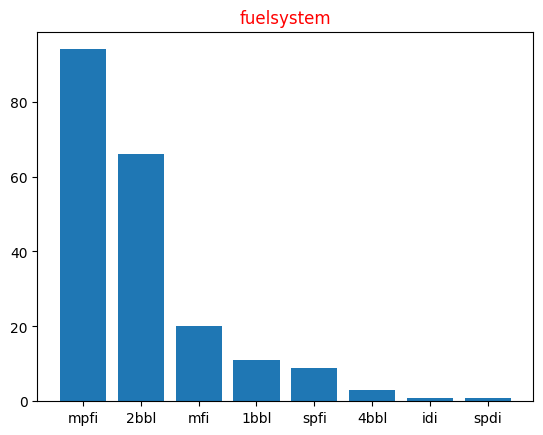

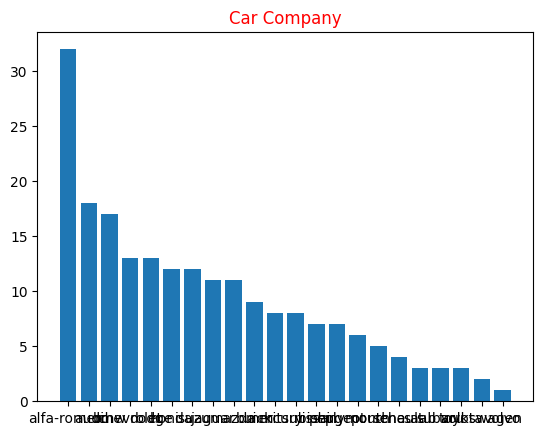

In [171]:
for i in cat_col:
  plt.bar(car[i].unique(),car[i].value_counts())
  plt.title(i,color='red')
  plt.show()

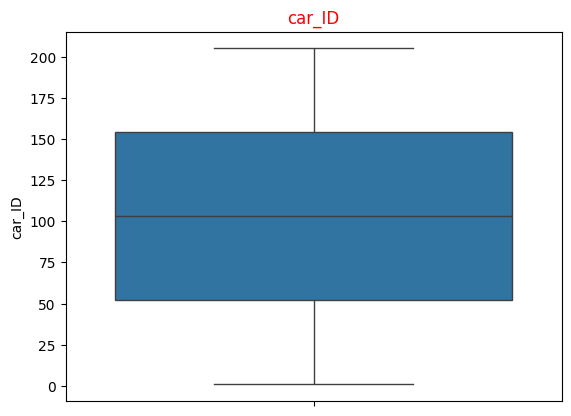

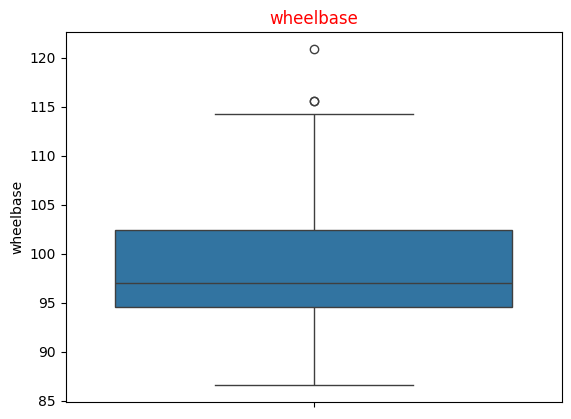

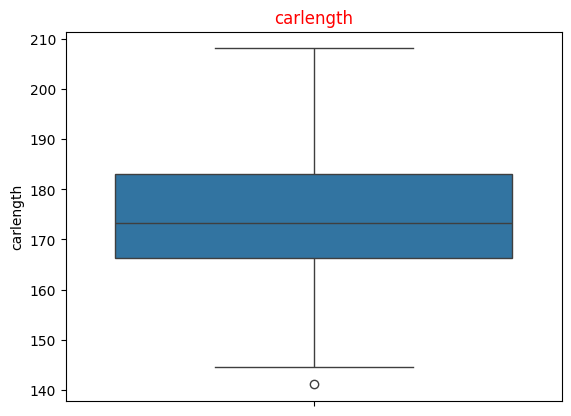

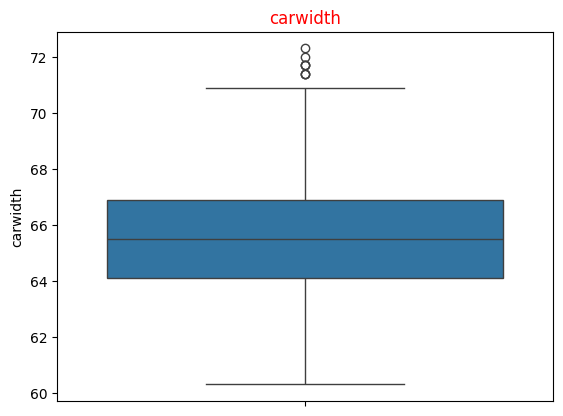

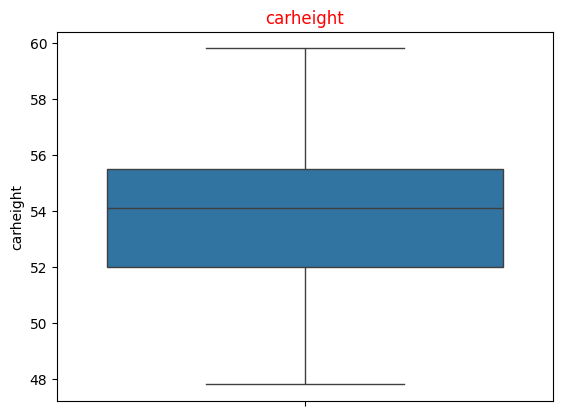

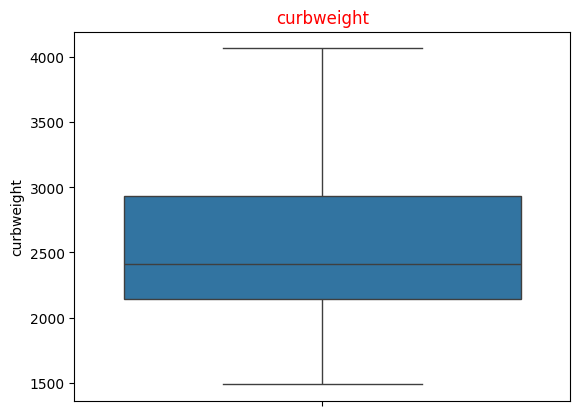

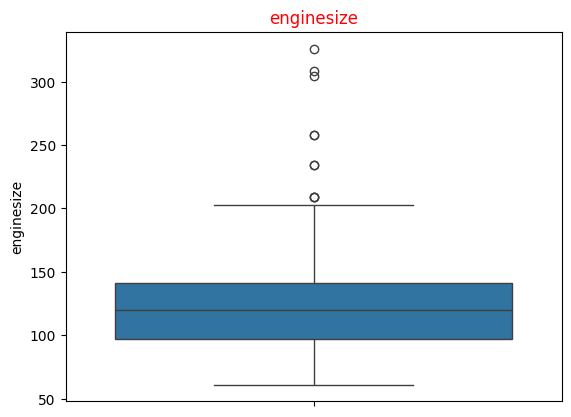

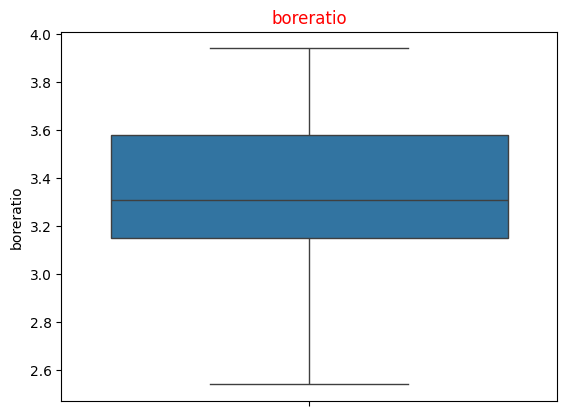

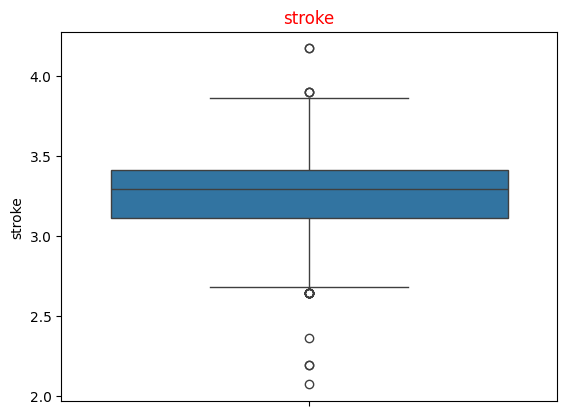

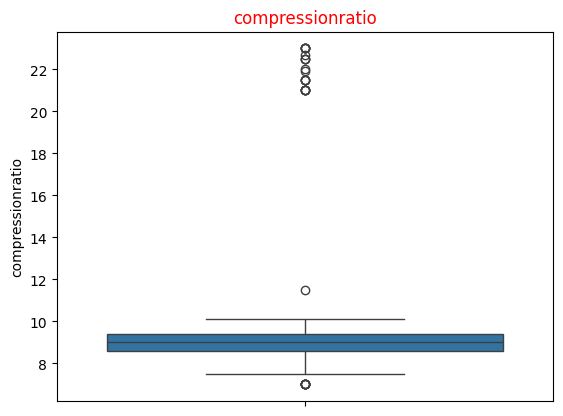

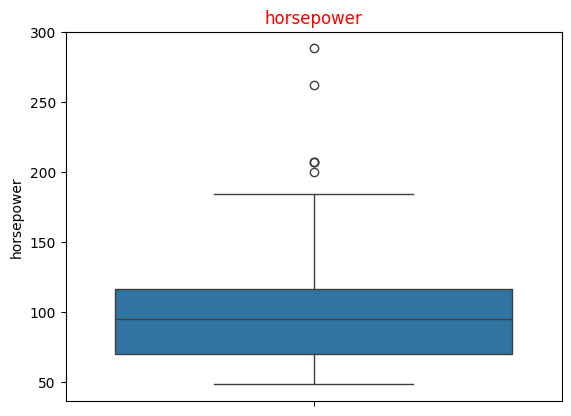

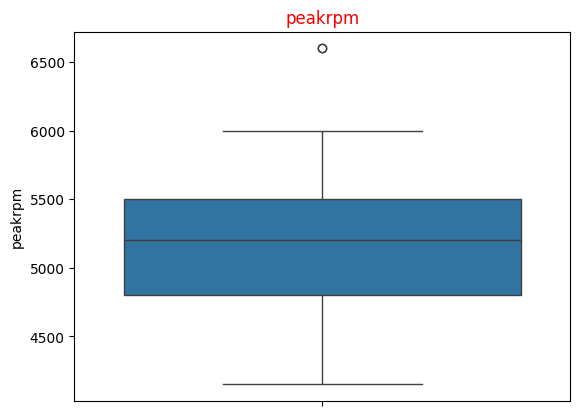

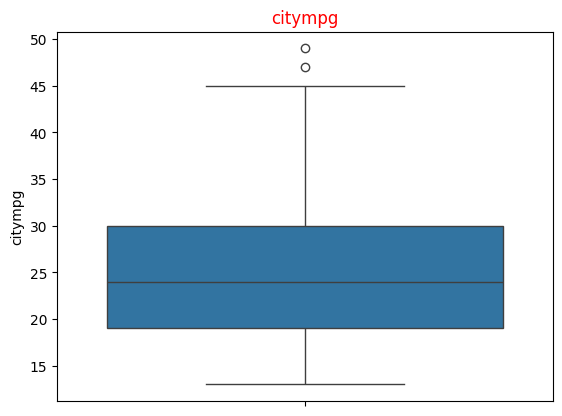

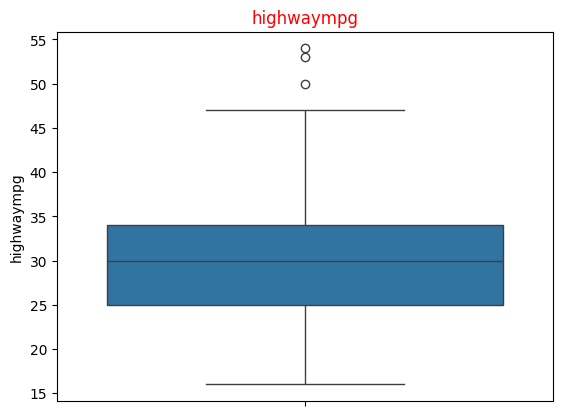

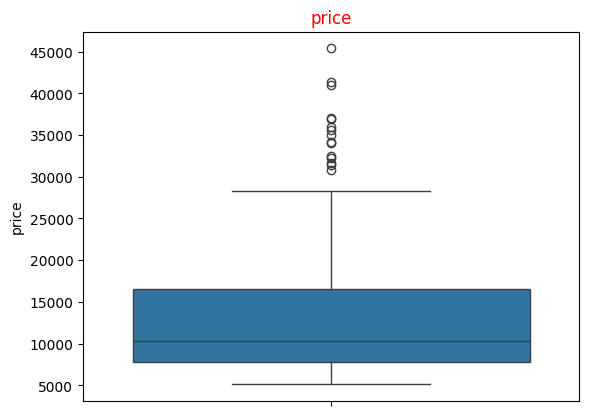

In [172]:
#Plot the Boxplots for Outliers
for i in num_col:
  sns.boxplot(car[i])
  plt.title(i,color='red')
  plt.show()

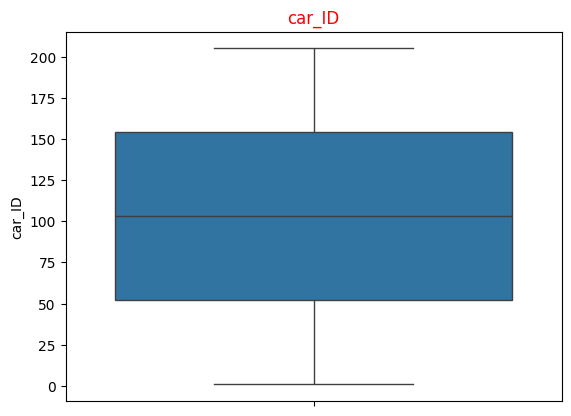

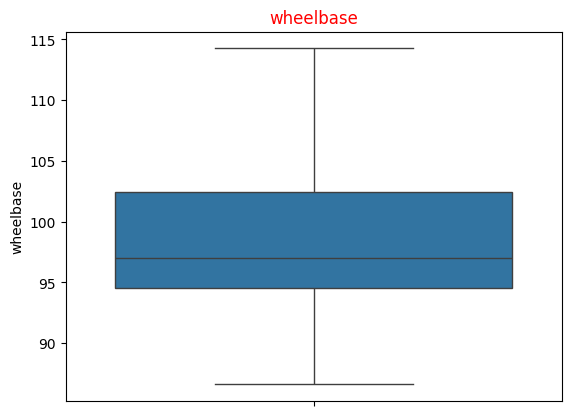

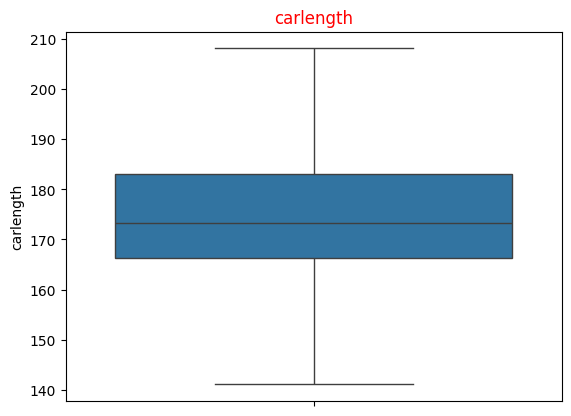

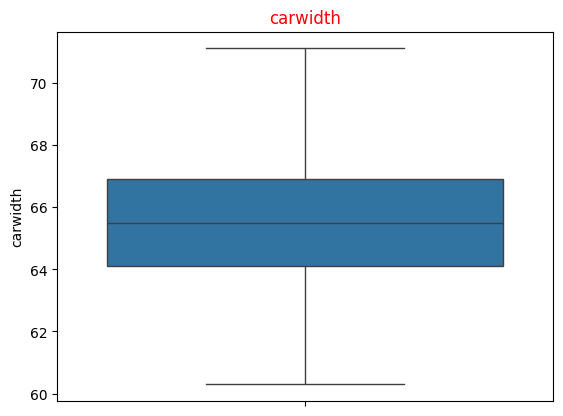

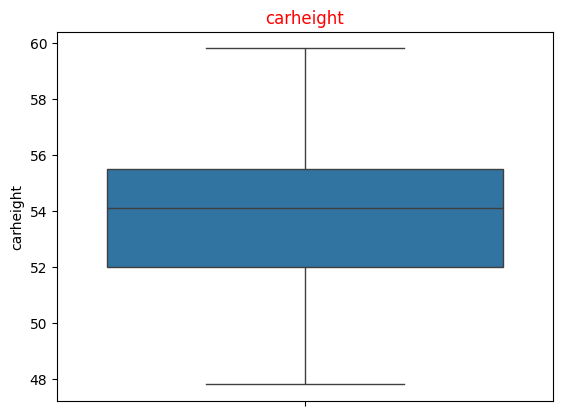

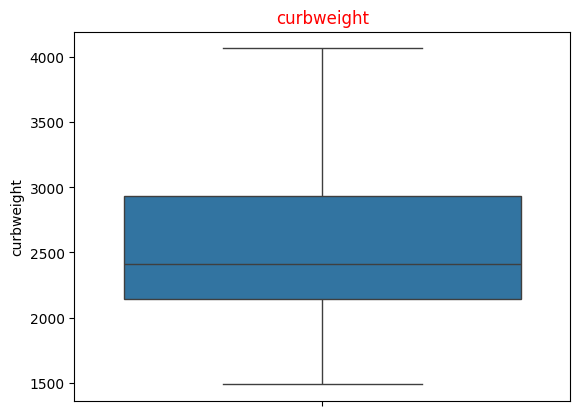

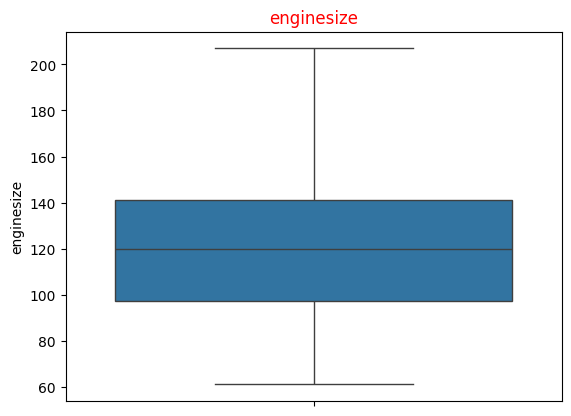

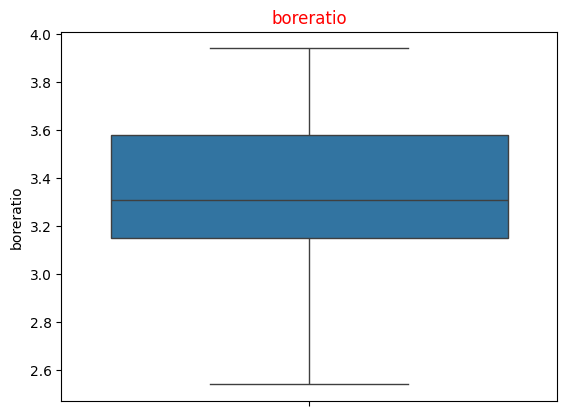

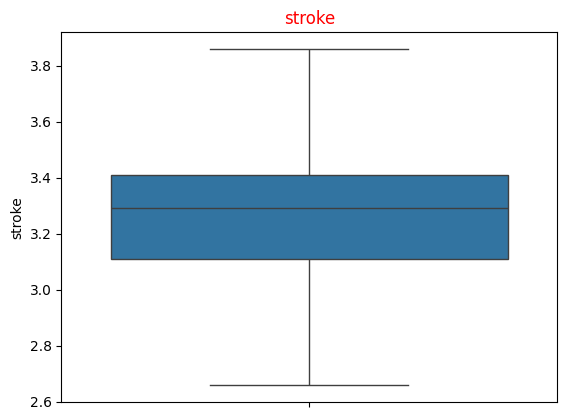

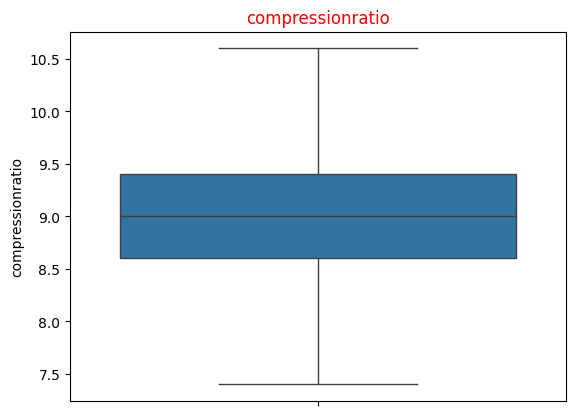

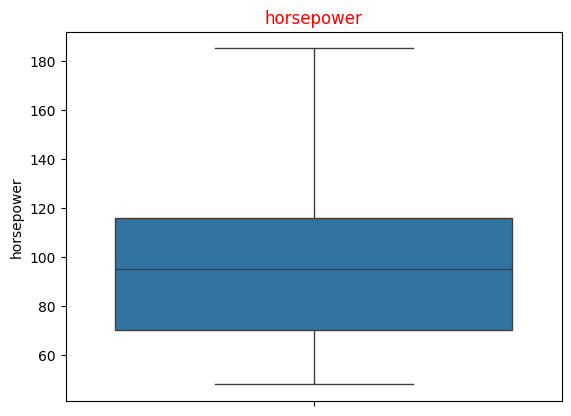

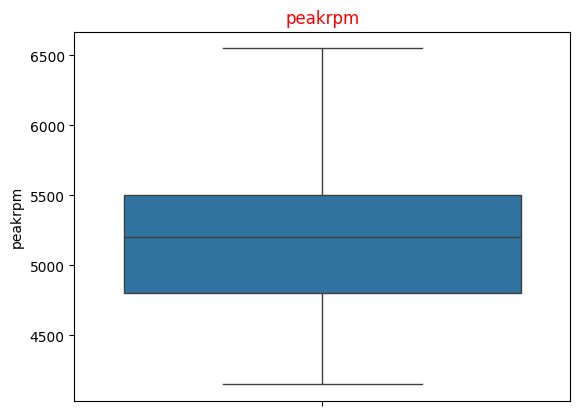

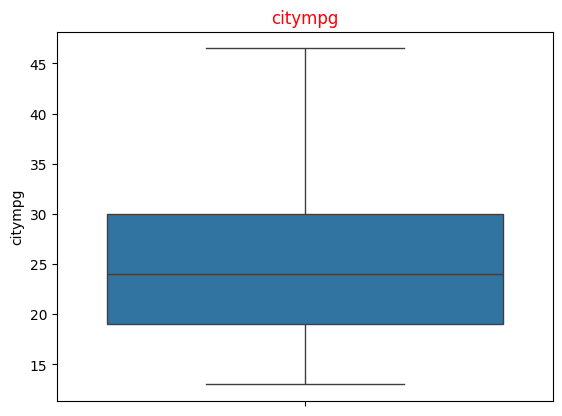

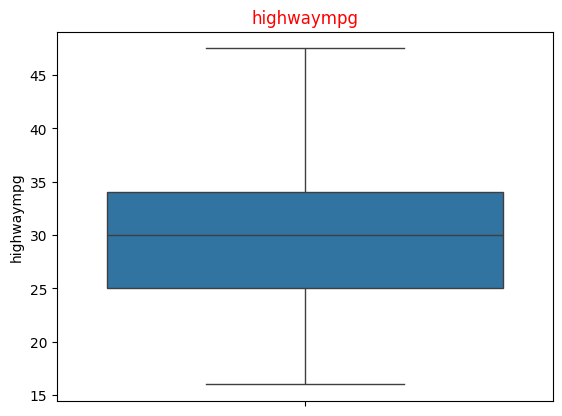

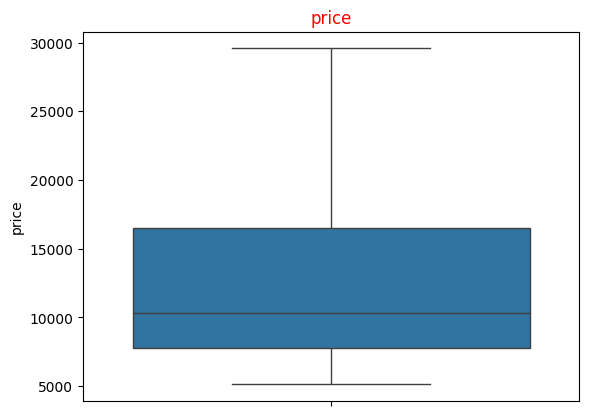

In [173]:
#Removal of Outliers
for col in num_col:
  q1=car[col].describe()["25%"]
  q3=car[col].describe()["75%"]
  iqr=q3-q1 #interquartile range
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  car[col]=np.where(car[col]>upper_bound,upper_bound,car[col])
  car[col]=np.where(car[col]<lower_bound,lower_bound,car[col])
  sns.boxplot(car[col])
  plt.title(col, color='red')
  plt.show()

**We can see that the outliers are removed**

### Data Preparation

In [174]:
#Create the dummy variables for the categorical columns
dummy1 = pd.get_dummies(car[cat_col],drop_first=True,dtype='int64')
dummy1.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Car Company_audi,Car Company_bmw,Car Company_buick,Car Company_chevrolet,Car Company_dodge,Car Company_honda,Car Company_isuzu,Car Company_jaguar,Car Company_mazda,Car Company_mercury,Car Company_mitsubishi,Car Company_nissan,Car Company_peugeot,Car Company_plymouth,Car Company_porsche,Car Company_renault,Car Company_saab,Car Company_subaru,Car Company_toyota,Car Company_volkswagen,Car Company_volvo
0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [175]:
dummy1.shape

(205, 55)

In [176]:
car = pd.concat([dummy1,car],axis=1)
car.shape

(205, 81)

In [177]:
car.drop(cat_col,axis=1,inplace=True)
car.shape

(205, 70)

In [178]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling_-1            205 non-null    int64  
 1   symboling_0             205 non-null    int64  
 2   symboling_1             205 non-null    int64  
 3   symboling_2             205 non-null    int64  
 4   symboling_3             205 non-null    int64  
 5   fueltype_gas            205 non-null    int64  
 6   aspiration_turbo        205 non-null    int64  
 7   doornumber_two          205 non-null    int64  
 8   carbody_hardtop         205 non-null    int64  
 9   carbody_hatchback       205 non-null    int64  
 10  carbody_sedan           205 non-null    int64  
 11  carbody_wagon           205 non-null    int64  
 12  drivewheel_fwd          205 non-null    int64  
 13  drivewheel_rwd          205 non-null    int64  
 14  enginelocation_rear     205 non-null    in

### Model Building & Predictions

In [179]:
#Create the dependent and independent variables
X = car.drop(['price','car_ID'],axis=1)
y = car['price']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((143, 68), (62, 68), (143,), (62,))

In [181]:
col = X_train.columns

In [182]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))

In [183]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [184]:
y_train_pred = lr.predict(X_train)
print('Train Set Results')
print('Train_RSquared_Value:',r2_score(y_train,y_train_pred))
print('Train_RSS:',np.sum(np.square(y_train - y_train_pred)))
print('Train_MSE:',mean_squared_error(y_train,y_train_pred))
print('Train_RMSE:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

Train Set Results
Train_RSquared_Value: 0.9812665594449562
Train_RSS: 2.6788819993712534
Train_MSE: 0.01873344055504373
Train_RMSE: 0.1368701594762121


In [185]:
y_test_pred = lr.predict(X_test)
print('Test Set Results')
print('Test_RSquared_Value:',r2_score(y_test,y_test_pred))
print('Test_RSS:',np.sum(np.square(y_test - y_test_pred)))
print('Test_MSE:',mean_squared_error(y_test,y_test_pred))
print('Test_RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Test Set Results
Test_RSquared_Value: -7.926233142530926e+19
Test_RSS: 4.581852136320648e+21
Test_MSE: 7.390084090839754e+19
Test_RMSE: 8596559829.862032


In [186]:
# Print the coefficients and intercept
print(lr.intercept_)
print(lr.coef_)

[-8.01595677e-05]
[[ 8.41564040e-02  1.43608814e-01  1.45310795e-01  1.07714197e-01
   1.29296243e-01  5.72666157e+11  1.65567745e-01 -5.26665365e-02
  -5.39016470e-02 -1.79538355e-01 -1.47387636e-01 -7.95169247e-02
  -6.03444573e-03  1.03098115e-01 -1.30819165e+11  2.77791843e-03
   6.45955326e+11 -6.82611250e-02  4.35264724e+11 -8.20457490e-03
  -1.56397947e+11  8.77306227e-02  2.63505361e-01 -6.81029903e-02
  -2.21652688e+11 -6.09822376e-03  1.56397947e+11  6.37853580e-02
  -3.94399035e-02  5.72666157e+11  2.89343433e+10  3.86519317e-02
   9.10675754e-03 -6.11063586e+10  4.46624756e-02  2.44522095e-01
   3.66144180e-02 -6.29730225e-02 -1.26037598e-01 -6.30435944e-02
  -3.11584473e-02  5.56030273e-02 -1.79443359e-02 -3.26632066e+09
  -1.64550781e-01 -1.91040039e-02 -6.11280733e+11 -1.01257324e-01
   1.67068481e-01 -2.96020508e-02  1.09069824e-01 -4.18321811e+11
  -7.53173828e-02 -1.62353516e-02  6.87456131e-02  3.04122925e-01
  -2.11578369e-01  1.61499023e-01 -1.67602539e-01  4.24163

In [187]:
lr_coef = pd.DataFrame()
lr_coef["Columns"] = col
lr_coef['Coefficient Estimate'] = pd.Series(lr.coef_.flatten())
lr_coef

,Columns,Coefficient Estimate
0,symboling_-1,8.415640e-02
1,symboling_0,1.436088e-01
2,symboling_1,1.453108e-01
3,symboling_2,1.077142e-01
4,symboling_3,1.292962e-01
5,fueltype_gas,5.726662e+11
6,aspiration_turbo,1.655677e-01
7,doornumber_two,-5.266654e-02
8,carbody_hardtop,-5.390165e-02
9,carbody_hatchback,-1.795384e-01


### Using Ridge Regression

In [188]:
params = {
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]
}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [189]:
model_cv.best_params_

{'alpha': 10.0}

In [190]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
ridge.coef_

array([[ 3.28219442e-02,  1.11009101e-02,  1.52065079e-02,
         1.13280816e-02,  4.98963853e-02, -3.21413964e-02,
         8.47002829e-02, -1.84620110e-02, -6.01064876e-03,
        -6.82419038e-02, -3.97860158e-02, -2.37495651e-02,
        -3.77271470e-02,  6.27027741e-02,  9.01392233e-02,
         3.38203161e-02, -3.76040309e-02,  1.98373614e-02,
        -3.13717039e-02,  9.08230438e-03,  1.45063456e-02,
        -2.26757413e-02, -7.41376313e-02, -1.20251744e-02,
         3.80738397e-02, -1.36154129e-02,  1.45063456e-02,
        -3.28619189e-03, -3.47712719e-02,  3.21413964e-02,
         0.00000000e+00,  1.37830234e-02, -1.47788227e-02,
         0.00000000e+00,  5.20012499e-02,  1.72084864e-01,
         1.12751712e-01, -2.33079685e-02, -5.77466745e-02,
        -2.33583958e-02, -7.15528915e-03,  1.22130948e-01,
        -2.98095344e-02,  0.00000000e+00, -8.56481919e-02,
        -4.37466868e-02, -5.35428178e-02, -4.09140439e-02,
         9.85797175e-02, -2.74947885e-02,  3.47103484e-0

In [191]:
y_test_pred = ridge.predict(X_test)
print('Test Set Results')
print('Test_RSquared_Value:',r2_score(y_test,y_test_pred))

y_train_pred = ridge.predict(X_train)
print('Train Set Results')
print('Train_RSquared_Value:',r2_score(y_train,y_train_pred))

Test Set Results
Test_RSquared_Value: 0.9256833213554504
Train Set Results
Train_RSquared_Value: 0.971404758479415


In [192]:
type(ridge.coef_)

numpy.ndarray

In [193]:
ridge_coef = pd.DataFrame()
ridge_coef["Columns"] = col
ridge_coef['Coefficient Estimate'] = pd.Series(ridge.coef_.flatten())
ridge_coef

,Columns,Coefficient Estimate
0,symboling_-1,0.032822
1,symboling_0,0.011101
2,symboling_1,0.015207
3,symboling_2,0.011328
4,symboling_3,0.049896
5,fueltype_gas,-0.032141
6,aspiration_turbo,0.084700
7,doornumber_two,-0.018462
8,carbody_hardtop,-0.006011
9,carbody_hatchback,-0.068242


### Using Lasso Regression

In [194]:
lasso = Lasso()

# cross validation
model_cv1 = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv1.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [195]:
# Printing the best hyperparameter alpha
print(model_cv1.best_params_)

{'alpha': 0.01}


In [196]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.01

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.02977108, -0.        , -0.        ,  0.        ,  0.03620729,
       -0.00653948,  0.06264009,  0.        ,  0.        , -0.02866847,
       -0.        , -0.01288575, -0.        ,  0.10537872,  0.0799084 ,
        0.01562324, -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.07389372,  0.        ,  0.01130122,
       -0.        , -0.        , -0.        , -0.01749255,  0.02035449,
        0.        ,  0.01273502, -0.        ,  0.        ,  0.0510288 ,
        0.19914008,  0.11971307,  0.        , -0.01350136, -0.        ,
        0.00444147,  0.11376519, -0.        ,  0.        , -0.05280862,
       -0.00271967, -0.0700536 , -0.00706463,  0.11849065, -0.01565985,
        0.03111203, -0.04503785, -0.04813069,  0.        ,  0.02141071,
        0.        , -0.        ,  0.21278749, -0.01735224,  0.3022442 ,
        0.02272014, -0.        , -0.02097754,  0.        ,  0.06659977,
       -0.        , -0.        , -0.        ])

In [197]:
col

Index(['symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Car Company_audi',
       'Car Company_bmw', 'Car Company_buick', 'Car Company_chevrolet',
       'Car Company_dodge', 'Car Company_honda', 'Car Company_isuzu',
       'Car Company_jaguar', 'Car Company_mazda', 'Car Company_mercury',
       'Car Company_mitsubishi', 'Car Compa

In [198]:
lasso_coef = pd.DataFrame()
lasso_coef["Columns"] = col
lasso_coef['Coefficient Estimate'] = pd.Series(lasso.coef_)
lasso_coef

,Columns,Coefficient Estimate
0,symboling_-1,0.029771
1,symboling_0,-0.000000
2,symboling_1,-0.000000
3,symboling_2,0.000000
4,symboling_3,0.036207
5,fueltype_gas,-0.006539
6,aspiration_turbo,0.062640
7,doornumber_two,0.000000
8,carbody_hardtop,0.000000
9,carbody_hatchback,-0.028668


In [199]:
y_test_pred = lasso.predict(X_test)
print('Test Set Results')
print('Test_RSquared_Value:',r2_score(y_test,y_test_pred))

y_train_pred = lasso.predict(X_train)
print('Train Set Results')
print('Train_RSquared_Value:',r2_score(y_train,y_train_pred))

Test Set Results
Test_RSquared_Value: 0.9301059031170965
Train Set Results
Train_RSquared_Value: 0.9658512410382736


### Comparing Results

In [200]:
results = pd.DataFrame()
results["Columns"] = col
results["Linear Regression"] = lr_coef["Coefficient Estimate"]
results["Ridge Regression"] = ridge_coef["Coefficient Estimate"]
results["Lasso Regression"] = lasso_coef["Coefficient Estimate"]
results

,Columns,Linear Regression,Ridge Regression,Lasso Regression
0,symboling_-1,8.415640e-02,0.032822,0.029771
1,symboling_0,1.436088e-01,0.011101,-0.000000
2,symboling_1,1.453108e-01,0.015207,-0.000000
3,symboling_2,1.077142e-01,0.011328,0.000000
4,symboling_3,1.292962e-01,0.049896,0.036207
5,fueltype_gas,5.726662e+11,-0.032141,-0.006539
6,aspiration_turbo,1.655677e-01,0.084700,0.062640
7,doornumber_two,-5.266654e-02,-0.018462,0.000000
8,carbody_hardtop,-5.390165e-02,-0.006011,0.000000
9,carbody_hatchback,-1.795384e-01,-0.068242,-0.028668
